In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [2]:
#path "C:\Users\USER\Documents\BA Internship\Examples\filtered_customer_booking.csv"
filtered = pd.read_csv("C:\\Users\\USER\\Documents\\BA Internship\\Examples\\filtered_customer_booking.csv", encoding="ISO-8859-1")
print(filtered)

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49977               2      Internet  RoundTrip             27               6   
49978               1      Internet  RoundTrip            111               6   
49979               1      Internet  RoundTrip             24               6   
49980               1      Internet  RoundTrip             15               6   
49981               1      Internet  RoundTrip             19               6   

       flight_hour  flight_

In [3]:
filtered.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [4]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49982 entries, 0 to 49981
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49982 non-null  int64  
 1   sales_channel          49982 non-null  object 
 2   trip_type              49982 non-null  object 
 3   purchase_lead          49982 non-null  int64  
 4   length_of_stay         49982 non-null  int64  
 5   flight_hour            49982 non-null  int64  
 6   flight_day             49982 non-null  int64  
 7   route                  49982 non-null  object 
 8   booking_origin         49982 non-null  object 
 9   wants_extra_baggage    49982 non-null  int64  
 10  wants_preferred_seat   49982 non-null  int64  
 11  wants_in_flight_meals  49982 non-null  int64  
 12  flight_duration        49982 non-null  float64
 13  booking_complete       49982 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [33]:
# A look at the targets - booking complete
filtered['booking_complete'].value_counts()

#the result shows that the dataset is highly inbalanced

booking_complete
0    42506
1     7476
Name: count, dtype: int64

In [6]:
#Balance the dataset with equal number of entries (7400) for both clases
balanced_df=filtered.groupby('booking_complete', as_index=False,group_keys=False).apply(lambda s: s.sample(7400,replace=False))
balanced_df
#balanced_df=Pdf_train.groupby('activity',as_index = False,group_keys=False).apply(lambda s: s.sample(100,replace=True))

C:\Users\USER\AppData\Local\Temp\ipykernel_5092\1772865503.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df=filtered.groupby('booking_complete', as_index=False,group_keys=False).apply(lambda s: s.sample(7400,replace=False))


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
31284,2,Internet,RoundTrip,359,4,4,2,DPSICN,Philippines,0,0,0,6.62,0
5384,2,Internet,RoundTrip,67,17,1,5,CMBSYD,Australia,1,1,0,8.58,0
26781,2,Internet,RoundTrip,249,3,17,6,CGKPEK,Indonesia,1,1,1,6.42,0
4717,1,Internet,CircleTrip,48,18,9,7,CMBMEL,Australia,1,0,0,8.83,0
29843,3,Internet,RoundTrip,77,4,4,2,CGKICN,Indonesia,1,0,1,6.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2,Internet,RoundTrip,56,21,2,7,AKLKUL,Malaysia,1,0,0,8.83,1
45122,1,Internet,RoundTrip,78,6,14,2,DPSHND,Japan,0,0,0,7.57,1
32727,1,Mobile,RoundTrip,131,4,12,6,ICNPEN,South Korea,0,1,0,6.62,1
32163,2,Internet,RoundTrip,76,4,18,5,HNDKCH,Japan,1,0,1,7.57,1


In [7]:
# check the distribution
balanced_df['booking_complete'].value_counts()/balanced_df.shape[0]

booking_complete
0    0.5
1    0.5
Name: count, dtype: float64

In [8]:
#drop categorical columns now
data_drop_cols=balanced_df

data_drop_cols.drop(['sales_channel', 'trip_type','booking_origin','route', 'wants_in_flight_meals', 
                     'wants_preferred_seat', 'wants_extra_baggage'],axis=1, inplace = True)
                                     
data_drop_cols.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,booking_complete
31284,2,359,4,4,2,6.62,0
5384,2,67,17,1,5,8.58,0
26781,2,249,3,17,6,6.42,0
4717,1,48,18,9,7,8.83,0
29843,3,77,4,4,2,6.62,0


In [9]:
#Store the label for supervised learning
label=data_drop_cols['booking_complete']
label

31284    0
5384     0
26781    0
4717     0
29843    0
        ..
1531     1
45122    1
32727    1
32163    1
41776    1
Name: booking_complete, Length: 14800, dtype: int64

In [10]:
# Selelct all rows and columns excepts the targets (booking complete)
unscaled_data=data_drop_cols.iloc[:,:-1]
unscaled_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration
31284,2,359,4,4,2,6.62
5384,2,67,17,1,5,8.58
26781,2,249,3,17,6,6.42
4717,1,48,18,9,7,8.83
29843,3,77,4,4,2,6.62
...,...,...,...,...,...,...
1531,2,56,21,2,7,8.83
45122,1,78,6,14,2,7.57
32727,1,131,4,12,6,6.62
32163,2,76,4,18,5,7.57


In [11]:
# Standardizing/Normalizing the data
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_data = scaler.fit_transform(unscaled_data)
scaled_data

array([[ 0.36181961,  3.05602771, -0.51234255, -0.95975821, -0.89753885,
        -0.32962229],
       [ 0.36181961, -0.18064508, -0.13809728, -1.5244266 ,  0.61516707,
         0.95678301],
       [ 0.36181961,  1.83673317, -0.54113064,  1.48713813,  1.11940238,
        -0.46088814],
       ...,
       [-0.59271342,  0.52876266, -0.51234255,  0.54602416,  1.11940238,
        -0.32962229],
       [ 0.36181961, -0.08088461, -0.51234255,  1.67536093,  0.61516707,
         0.29389048],
       [-0.59271342, -0.73486987, -0.48355445, -0.77153541,  1.11940238,
        -0.98595152]])

In [12]:
data_nolabel=scaled_data

In [13]:
scaled_data.shape

(14800, 6)

In [14]:
data_nolabel.shape

(14800, 6)

In [15]:
data_nolabel = pd.DataFrame(data_nolabel,columns = unscaled_data.columns)
data_nolabel

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration
0,0.361820,3.056028,-0.512343,-0.959758,-0.897539,-0.329622
1,0.361820,-0.180645,-0.138097,-1.524427,0.615167,0.956783
2,0.361820,1.836733,-0.541131,1.487138,1.119402,-0.460888
3,-0.592713,-0.391250,-0.109309,-0.018644,1.623638,1.120865
4,1.316353,-0.069800,-0.512343,-0.959758,-0.897539,-0.329622
...,...,...,...,...,...,...
14795,0.361820,-0.302575,-0.022945,-1.336204,1.623638,1.120865
14796,-0.592713,-0.058716,-0.454766,0.922470,-0.897539,0.293890
14797,-0.592713,0.528763,-0.512343,0.546024,1.119402,-0.329622
14798,0.361820,-0.080885,-0.512343,1.675361,0.615167,0.293890


In [16]:
#create a dataframe of scaled data
scaled_data = pd.DataFrame(scaled_data, columns = unscaled_data.columns)

In [17]:
# add the labels back to the dataframe
scaled_data['label']  = label

scaled_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,label
0,0.361820,3.056028,-0.512343,-0.959758,-0.897539,-0.329622,NaN
1,0.361820,-0.180645,-0.138097,-1.524427,0.615167,0.956783,NaN
2,0.361820,1.836733,-0.541131,1.487138,1.119402,-0.460888,0.0
3,-0.592713,-0.391250,-0.109309,-0.018644,1.623638,1.120865,NaN
4,1.316353,-0.069800,-0.512343,-0.959758,-0.897539,-0.329622,NaN
...,...,...,...,...,...,...,...
14795,0.361820,-0.302575,-0.022945,-1.336204,1.623638,1.120865,NaN
14796,-0.592713,-0.058716,-0.454766,0.922470,-0.897539,0.293890,NaN
14797,-0.592713,0.528763,-0.512343,0.546024,1.119402,-0.329622,NaN
14798,0.361820,-0.080885,-0.512343,1.675361,0.615167,0.293890,NaN


<Axes: >

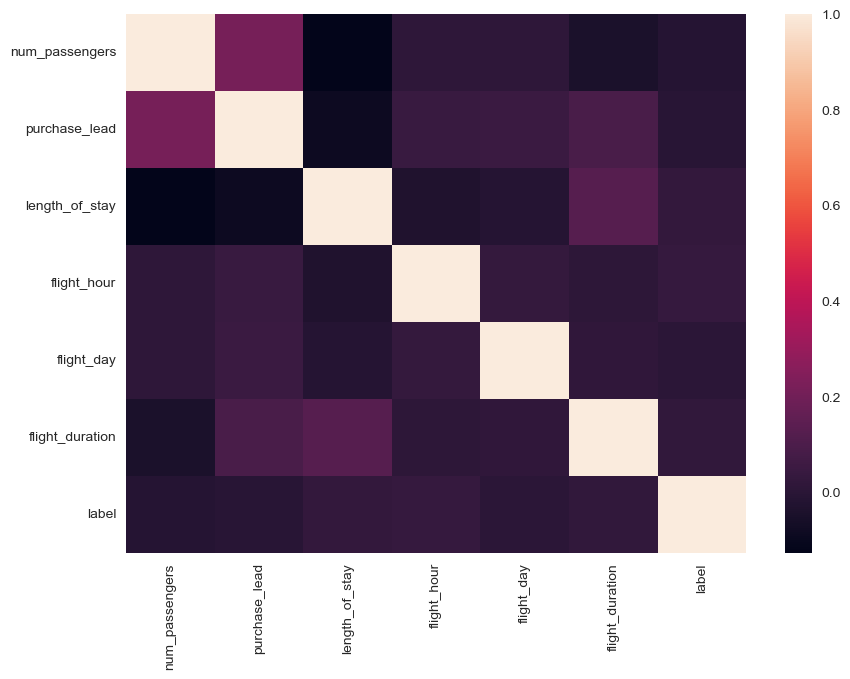

In [18]:
#Correlation matrix
corr = scaled_data.corr()
plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

In [19]:
#Split the data into train and test
#import the relevant modules
from sklearn.model_selection import train_test_split

#Feature matrix and target vector
x = scaled_data.iloc[:,:-1]
y = label

#Declare 4 variables for the split
x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), train_size = 0.75,
                                                    test_size=0.25, random_state=42)

In [20]:
# check the shape of the train inputs and targets
print (x_train.shape, y_train.shape)

(11100, 6) (11100,)


In [21]:
# check the shape of the test inputs and targets
print (x_test.shape, y_test.shape)

(3700, 6) (3700,)


In [22]:
#Train a machine learning model - Random Forest
model = RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=3,n_estimators=30,oob_score=True,min_samples_split=100, max_leaf_nodes=200,random_state=22)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, max_leaf_nodes=200,
                       min_samples_leaf=3, min_samples_split=100,
                       n_estimators=30, oob_score=True, random_state=22)

In [23]:
#Check the model accuracy
train_accuracy= model.fit(x_train, y_train)
print(train_accuracy.score(x_train, y_train))

0.6651351351351351


In [24]:
#TESTING THE MODEL
# assess the test accuracy of the model
model.score(x_test,y_test)

0.6218918918918919

In [25]:
#Evaluate the model
#CLASSIFICATION REPORT
#Precision: Percentage of correct positive predictions relative to total positive predictions.
#Recall: Percentage of correct positive predictions relative to total actual positives.
#F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
y_pred=model.predict(x_test)
print("Confusion Matrix:")
#print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1833
           1       0.62      0.67      0.64      1867

    accuracy                           0.62      3700
   macro avg       0.62      0.62      0.62      3700
weighted avg       0.62      0.62      0.62      3700


Accuracy Score:
0.6218918918918919


In [26]:
#Cross Validation
cv_scores=cross_val_score(model, x, y, cv=10)
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.6277027  0.625      0.62364865 0.61959459 0.61148649 0.61554054
 0.63040541 0.60945946 0.63040541 0.6222973 ]
Mean cross-validation score: 0.6215540540540541


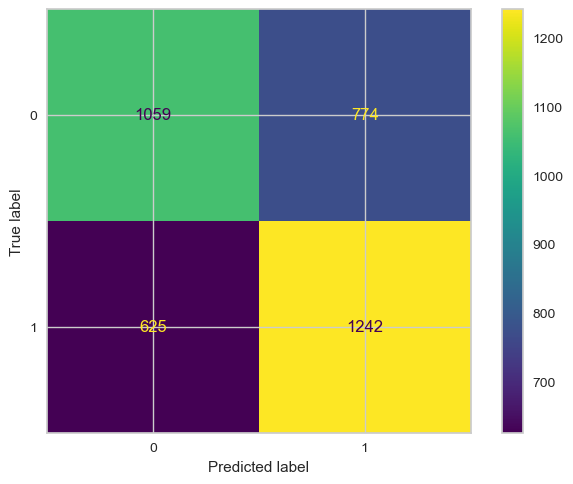

In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics

#confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [28]:
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[1059  774]
 [ 625 1242]]


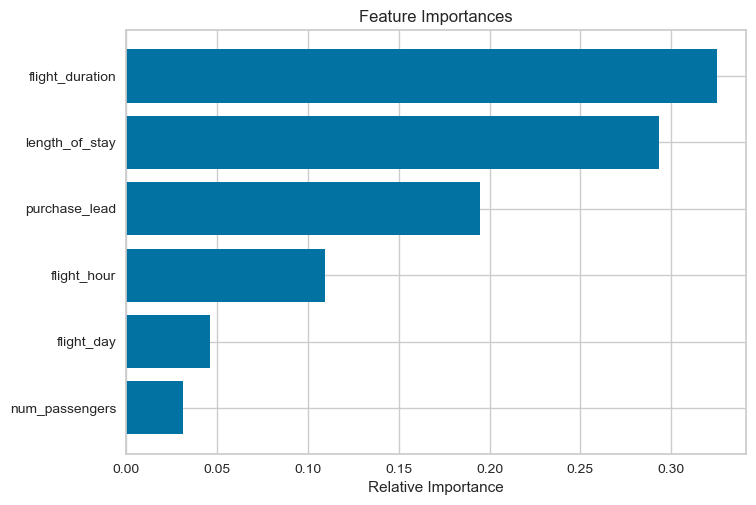

In [29]:
#Checking for the most important features
from sklearn.ensemble import RandomForestClassifier
features=data_nolabel.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
# find the predicted probabilities of each class
# the first column shows the probability of a particular observation to be 0, while the second one - to be 1
predicted_proba = model.predict_proba(x_test)

# let's check that out
predicted_proba

array([[0.50142671, 0.49857329],
       [0.6864464 , 0.3135536 ],
       [0.37605885, 0.62394115],
       ...,
       [0.72115871, 0.27884129],
       [0.44369449, 0.55630551],
       [0.39633528, 0.60366472]])

In [31]:
predicted_proba.shape

(3700, 2)

In [32]:
# Select ONLY the probabilities referring to 1s
predicted_proba[:,1]

array([0.49857329, 0.3135536 , 0.62394115, ..., 0.27884129, 0.55630551,
       0.60366472])